## 1) The horsekick death data from prussian army (HorseKicks.txt)is a famous dataset that was first explained by the Poisson distribution (and led to popular use of the distribution). It is a count of soldiers in the Prussian cavalry killed by horse kicks, by corp (15 corps) membership and by year (1875 to 1894). How would you explain the data using the Poisson distribution ?



In [1]:
# load in my data
horsekick_data <- read.table("HorseKicks.txt", header = TRUE)
head(horsekick_data) # just to look

,Year,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
3,1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
4,1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
5,1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0
6,1880,0,3,2,1,1,1,0,0,0,2,1,4,3,0


Lambda would be average death per corp. 
- Find column average
- Find the average of averages. 

In [2]:
corps_averages <- colMeans(horsekick_data[, grep("C", names(horsekick_data))]) # column average excluding the year

lambda <- mean(corps_averages) # define our lambda
lambda

[1] 0.7

In [3]:
# Do it like it is shown in the lecture notes, find the probability of 1 death in each corp
# probability that there is 1 death in each corp
cat("Probability that there is 1 death:")
expected_1 <- dpois(1,lambda) 
expected_1* 100
cat("\n")

#probability that there are 2 deaths in each corp
cat("Probability that there are 2 deaths:")
expected_2<- dpois(2, lambda) 
expected_2* 100
cat("\n")

# probability that there are no deaths in each corp
cat("Probability that there are  no deaths:")
expected_0<- dpois(0, lambda) 
expected_0* 100
cat("\n")

# probability that there are 3 deaths in each corp
cat("Probability that there are 3+ deaths:")
expected_3plus <- 1 - (expected_0 + expected_1 + expected_2)
expected_3plus * 100


Probability that there is 1 death:

[1] 34.76097


Probability that there are 2 deaths:

[1] 12.16634


Probability that there are  no deaths:

[1] 49.65853


Probability that there are 3+ deaths:

[1] 3.414158

## Is the data a good fit for the Poisson distribution ? 

In [4]:
# we can just a chi square test to compare observed vs expected.

# First we need observed counts
# dpois data will be used for expected

# Flatten the death count data to a single vector (excluding non-death columns like "Year" or "GC")
death_counts <- as.vector(as.matrix(horsekick_data[, grep("C", names(horsekick_data))]))

# Get observed frequencies of each death count (0, 1, 2, 3, 4)
observed_counts_4 <- table(death_counts)

# Print observed counts
print(observed_counts_4) # we see that there is max of 4 deaths

# Calculate total number of observations
total_counts <- sum(observed_counts_4)

# Calculate probabilities for each death count
observed_probabilities <- observed_counts_4 / total_counts

# Print observed probabilities
print(observed_probabilities)

death_counts
  0   1   2   3   4 
144  91  32  11   2 
death_counts
          0           1           2           3           4 
0.514285714 0.325000000 0.114285714 0.039285714 0.007142857 


In [5]:
# Time to do the expected

#concatenate into one vector
expected_probs <- c(expected_0, expected_1,expected_2, expected_3plus)

#total amount of death counts observed
total_obs <- length(death_counts)


# Calculate the epected
expected_counts <- expected_probs * total_obs
expected_counts # just to see

[1] 139.043885  97.330720  34.065752   9.559644

In [6]:
# Need to create a new vector where there is a column of 3+ deaths
death_counts <- as.vector(as.matrix(horsekick_data[, grep("C", names(horsekick_data))]))
observed_counts <- table(factor(pmin(death_counts, 3), levels = 0:3))  
# 3+ deaths grouped into one column "3"
head(observed_counts)


  0   1   2   3 
144  91  32  13 

In [7]:
# Perform the chisq
chisq_test <- chisq.test(x = observed_counts, p = expected_probs, rescale.p = TRUE)
# rescale.p = TRUE to rescale the probabilities to one
chisq_test


	Chi-squared test for given probabilities

data:  observed_counts
X-squared = 1.9518, df = 3, p-value = 0.5825


Since the p value is greater than 0.05, we can accept the null hypothesis and say that the data is a good fit for the Poisson distribution.

## Plot the data and show your fit and submit your R code with annotations. 




I will plot the probability for each possible count. 

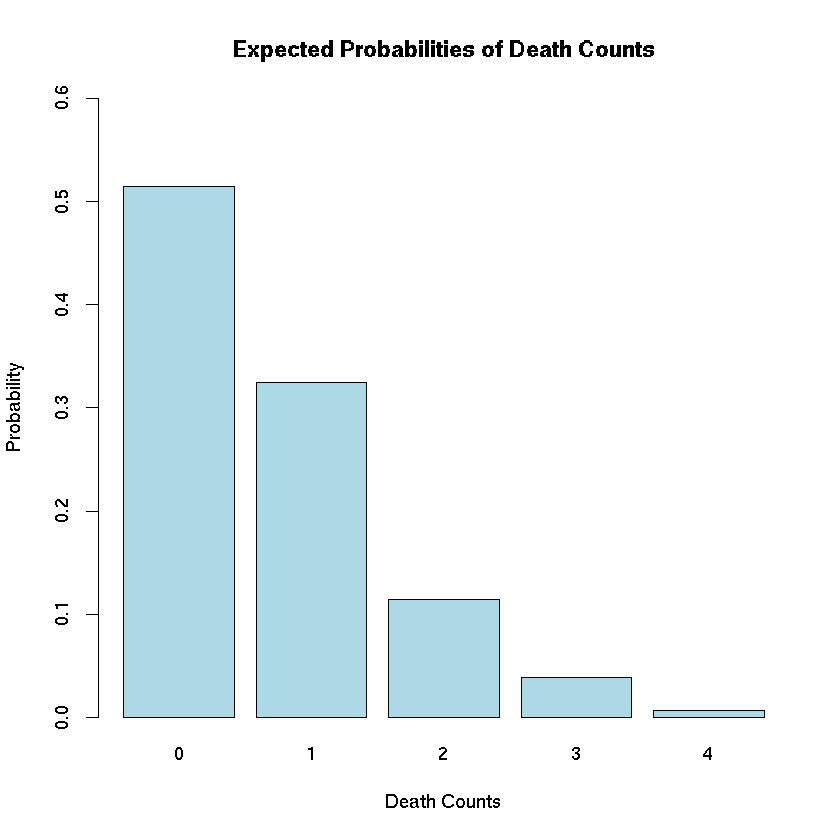

In [46]:
#probabilities of the observed
# Define the labels for each count
counts <- c("0", "1", "2", "3", "4") # this will be for the x axis
barplot(observed_probabilities, names.arg = counts,  # plot the observed probabilites
        col = "lightblue", 
        ylab = "Probability", 
        xlab = "Death Counts", 
        main = "Expected Probabilities of Death Counts",
        ylim = c(0, 0.6)) # adjust the upper limit


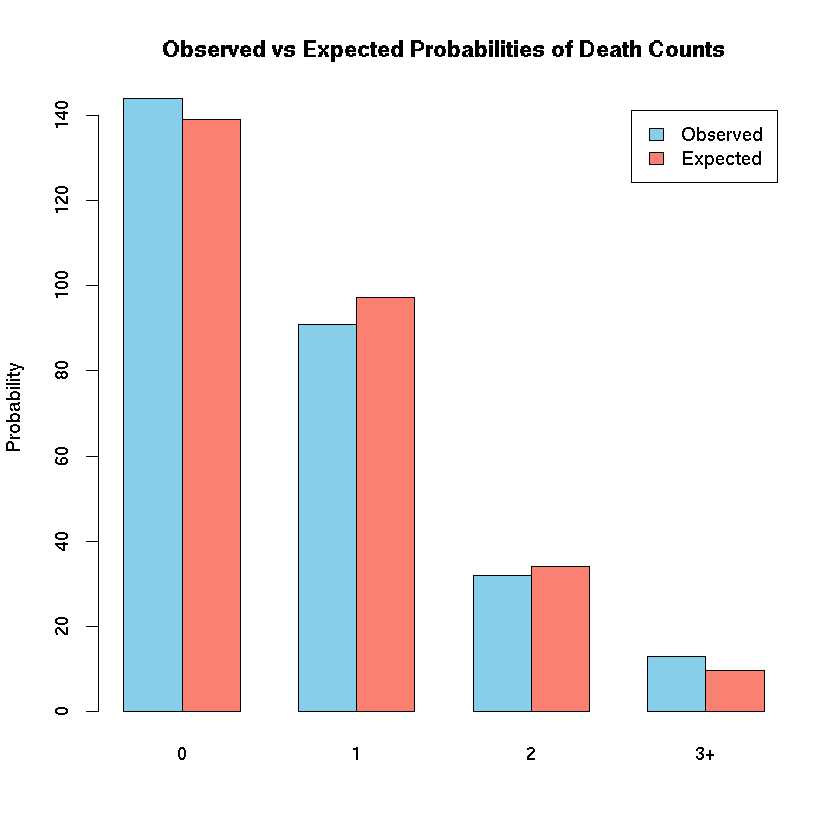

In [9]:
# This is just a plot of the expected counts and observed countss
# just for fun.

counts <- c("0", "1", "2", "3+")
barplot(rbind(observed_counts, expected_counts), beside = TRUE, # We will plot observed counts vs expected counts
        names.arg = counts, col = c("skyblue", "salmon"),
        legend.text = c("Observed", "Expected"),
        ylab = "Probability",
        main = "Observed vs Expected Probabilities of Death Counts")

# From the plot we can see that they are not too far from each other. 

## 2) In the mrnaseq_count_data.xlsx file,
##   a) for each column determine the boxcox transform that would make them gaussian
##   b) is there a universal transform ?
##   c) would a log-transform be good enough  ?

## The log-transform is often used to transform expression data.

In [20]:
#install.packages("readxl") # to read in excel files


Installing package into ‘/home/ttang1230/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)



In [21]:
library(readxl) # library to open xcel files
mrna_data <- read_excel("mrnaseq_count_data.xlsx")
# reading it in weird...
# going to rewrite the column names, can't figure out how to get it to read in properly
colnames(mrna_data) <- c("Gene", "aboral1", "aboral2", "aboral3", "aboral4",
                            "oral1", "oral2", "oral3", "oral4")

# View the first few rows to confirm
head(mrna_data)

New names:
• `` -> `...9`


Gene,aboral1,aboral2,aboral3,aboral4,oral1,oral2,oral3,oral4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML000110a,69,175,141,139,108,146,133,63
ML000111a,0,0,0,0,0,1,0,0
ML000112a,1,10,8,3,2,13,6,1
ML000113a,383,546,402,471,290,190,282,317
ML000114a,188,214,257,230,289,215,162,128
ML000115a,493,455,540,501,413,403,419,452


Used this website to learn how to compute boxcox using MASS

https://www.r-bloggers.com/2022/10/box-cox-transformation-in-r/


The Shapiro Wilks test has a limit of 3000 rows, there are 16,000+ rows in this dataset so I will be doing the box cox transformation from the MASS library in R, and not from the function given in the notes. 

### for each column determine the boxcox transform that would make them gaussian

Gene,aboral1,aboral2,aboral3,aboral4,oral1,oral2,oral3,oral4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML000110a,69.001,175.001,141.001,139.001,108.001,146.001,133.001,63.001
ML000111a,0.001,0.001,0.001,0.001,0.001,1.001,0.001,0.001
ML000112a,1.001,10.001,8.001,3.001,2.001,13.001,6.001,1.001
ML000113a,383.001,546.001,402.001,471.001,290.001,190.001,282.001,317.001
ML000114a,188.001,214.001,257.001,230.001,289.001,215.001,162.001,128.001
ML000115a,493.001,455.001,540.001,501.001,413.001,403.001,419.001,452.001


[1] 0.1818182

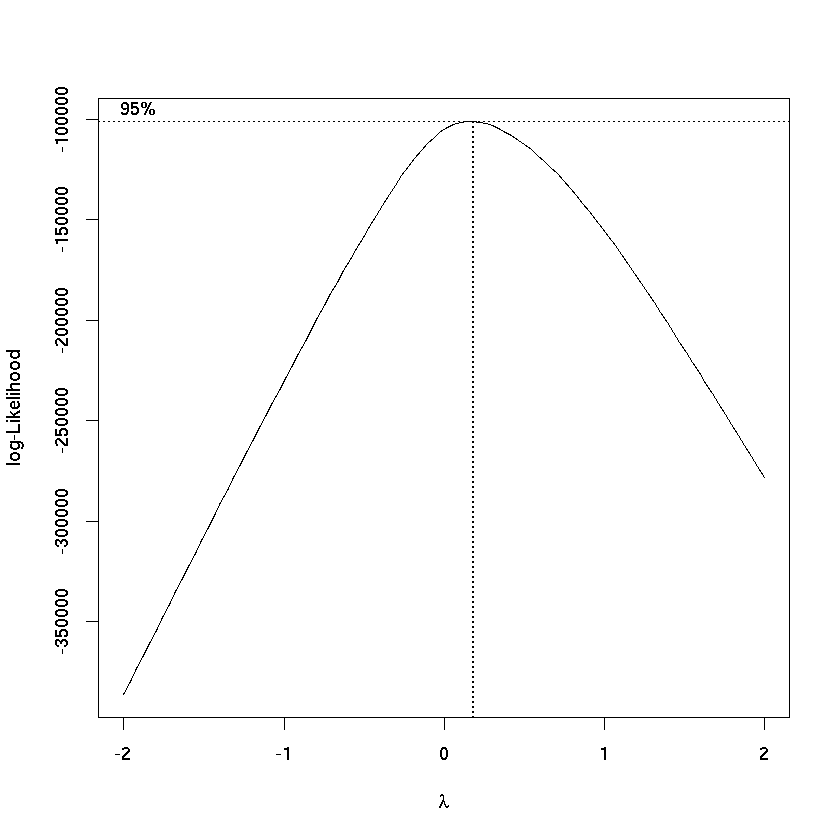

In [36]:

# All numbers in box cox must be positive, so I will add a small constant to each column to ensure positivity
# Add a small constant to each column to ensure positivity
# Small constant shouldn't affect the outcome too much
mrna_positive <- mrna_data
mrna_positive[ , -1] <- mrna_data[ , -1] + .001
head(mrna_positive)
b <- boxcox(lm(mrna_positive$aboral1 ~ 1))
optimal_lambda <- b$x[which.max(b$y)]
optimal_lambda

#looks like this works, I will apply this in a look for every column

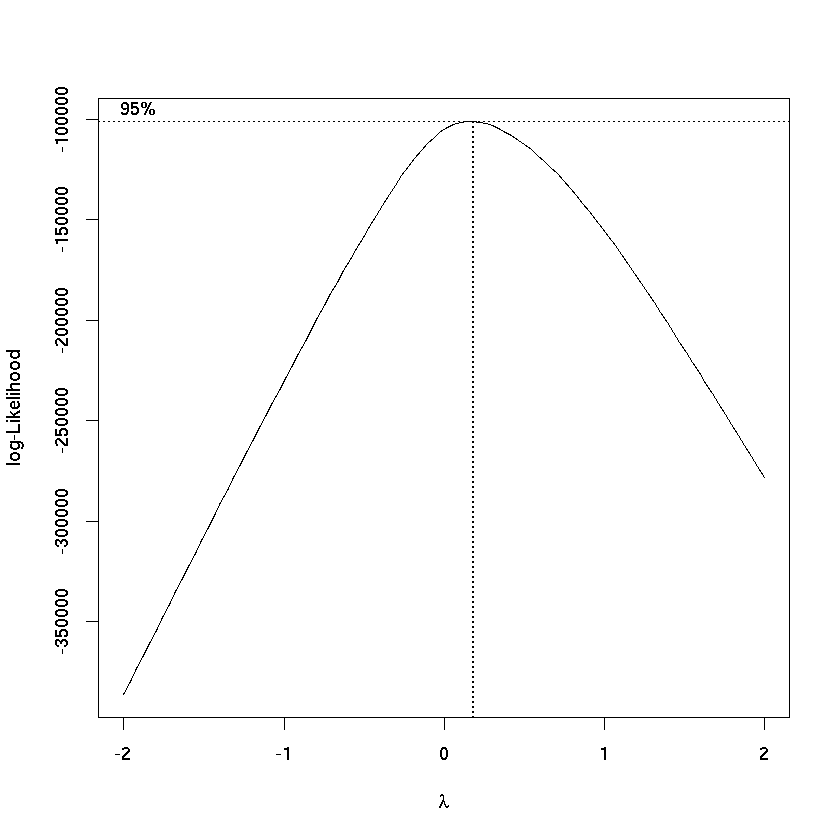

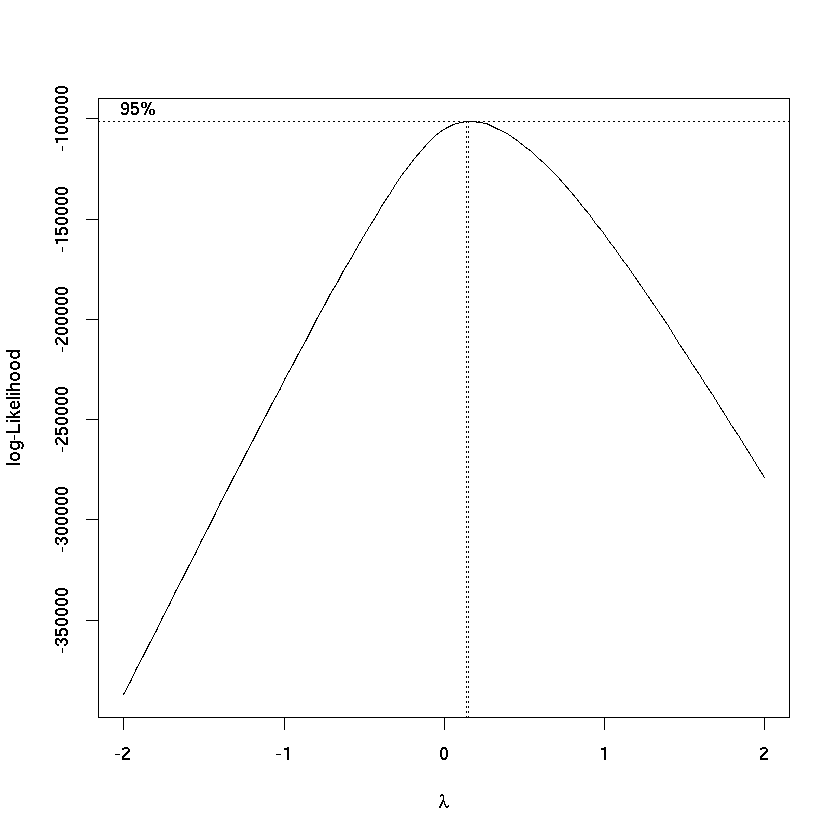

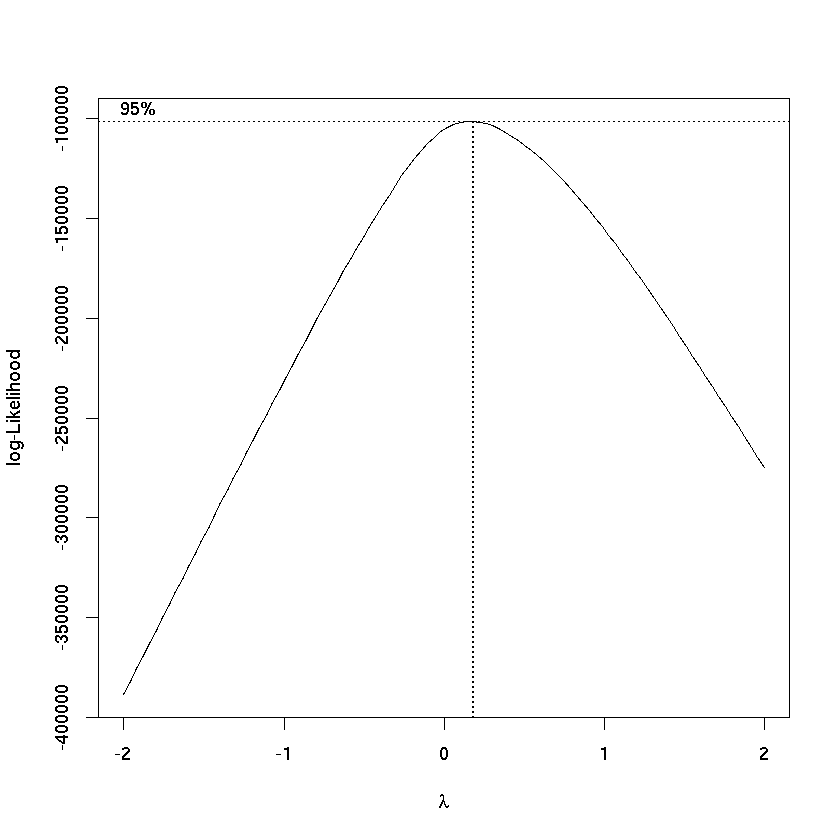

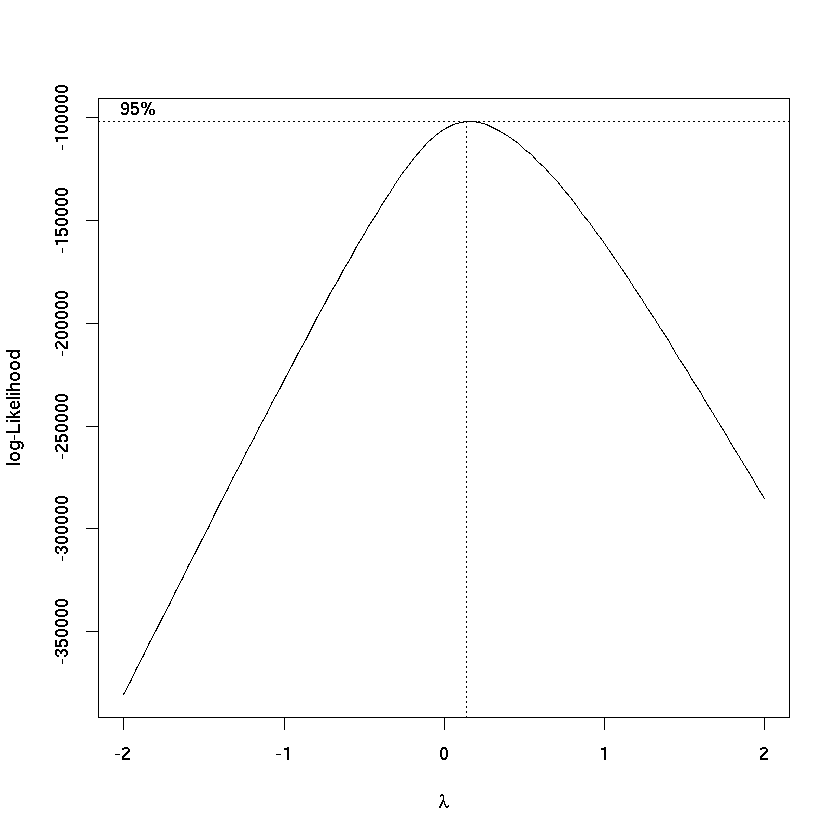

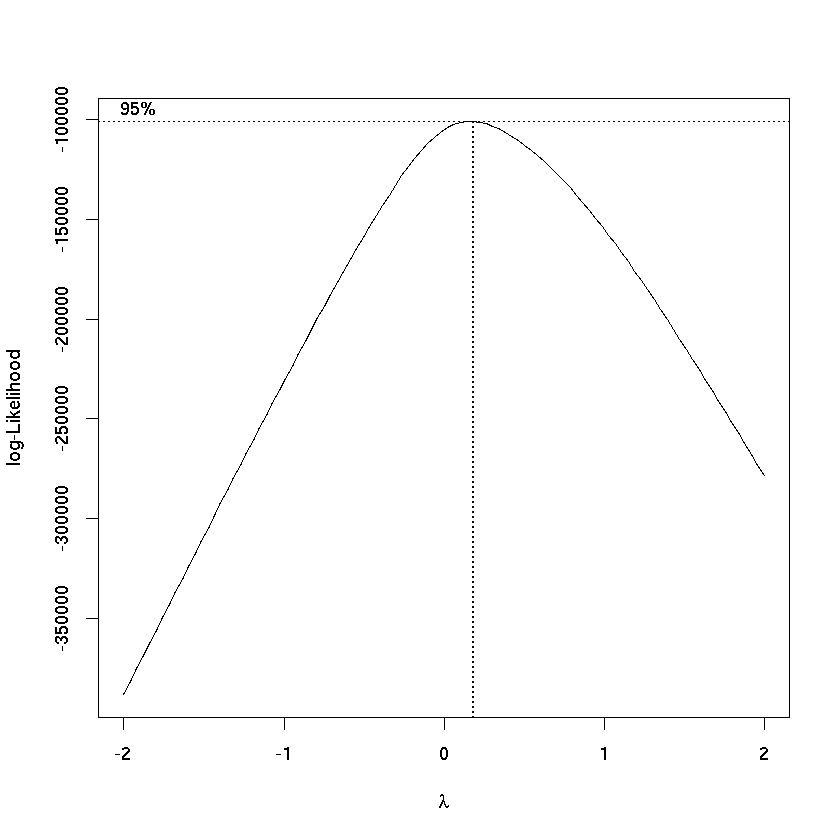

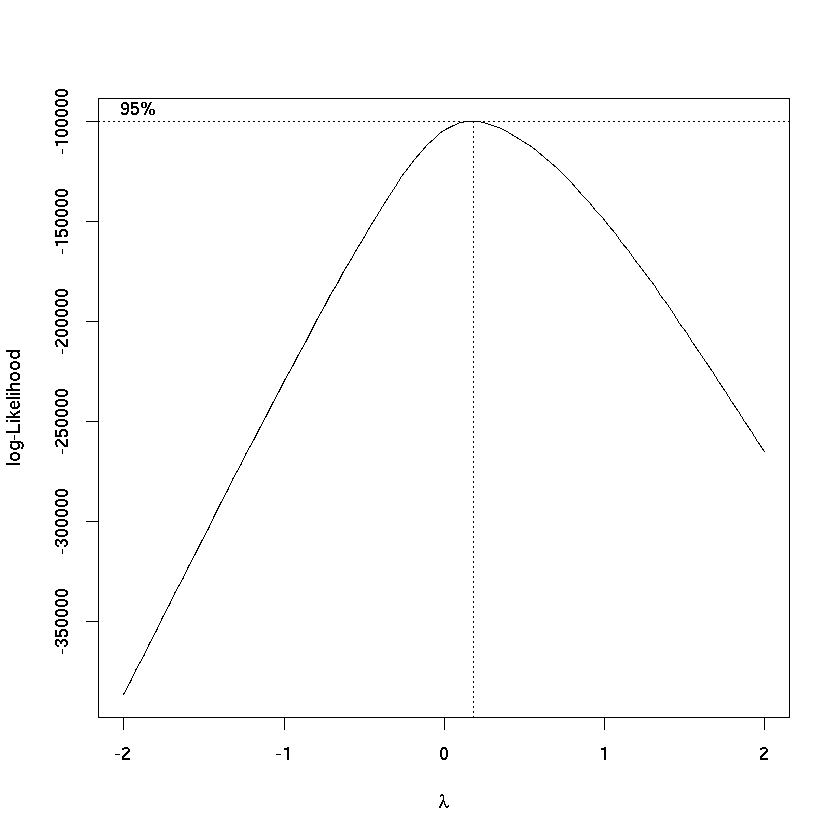

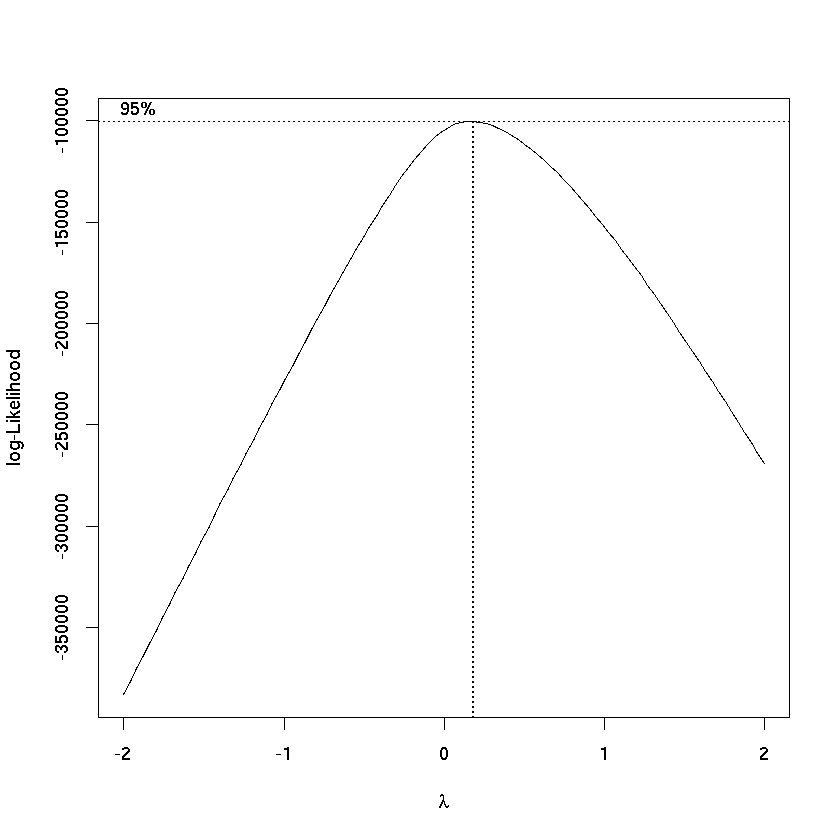

$aboral1
[1] 0.1818182

$aboral2
[1] 0.1414141

$aboral3
[1] 0.1818182

$aboral4
[1] 0.1414141

$oral1
[1] 0.1818182

$oral2
[1] 0.1818182

$oral3
[1] 0.1818182

$oral4
[1] 0.1818182



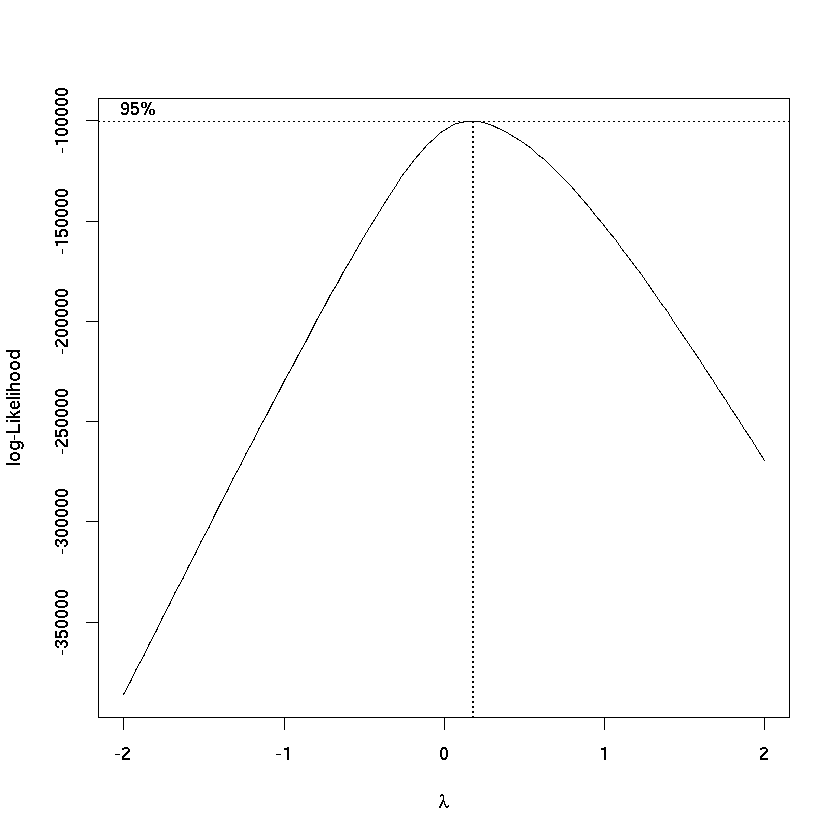

In [38]:
# Initialize a list to store optimal lambdas for each column
lambdas <- list()

# Want to go through every column except gene
for (col_name in colnames(mrna_data)[-1]) {
    
    # Perform Box-Cox to find optimal lambda
    b <- boxcox(lm(mrna_positive[[col_name]] ~ 1))

    # Get optimal lambda
    optimal_lambda <- b$x[which.max(b$y)]
    
    # Store the optimal lambda
    lambdas[[col_name]] <- optimal_lambda
}

# Print the optimal lambdas for each column
print(lambdas)

### Is there a universal transform ?

All of the best lambdas look fairly close, we can calculate a universal transform

In [39]:
# Calculate the average lambda across all columns
# use this average for a universal transform.
average_lambda <- mean(unlist(lambdas))

# Print the average lambda
print(average_lambda)

[1] 0.1717172


In [40]:
# Apply the universal transformation to each column
mrna_transformed <- mrna_positive

for (col_name in colnames(mrna_transformed)[-1]) {
    # Apply the Box-Cox transformation with the universal lambda
    mrna_transformed[[col_name]] <- (mrna_positive[[col_name]] ^ average_lambda - 1) / average_lambda
}

# View the transformed data
head(mrna_transformed)

Gene,aboral1,aboral2,aboral3,aboral4,oral1,oral2,oral3,oral4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML000110a,6.2254238321,8.313392,7.798588,7.765212,7.1889705,7.880344e+00,7.662641,6.0386674465
ML000111a,-4.0451076743,-4.045108,-4.045108,-4.045108,-4.0451077,9.995861e-04,-4.045108,-4.0451076743
ML000112a,0.0009995861,2.824375,2.499313,1.209477,0.7366478,3.222859e+00,2.098211,0.0009995861
ML000113a,10.3485570806,11.363839,10.483573,10.933230,9.5942756,8.514445e+00,9.520393,9.8317683147
ML000114a,8.4884144420,8.810323,9.277740,8.992636,9.5851333,8.822043e+00,8.127248,7.5741935142
ML000115a,11.0651029276,10.834079,11.331258,11.111850,10.5593411,1.049053e+01,10.599967,10.8151671164


### Would a log-transform be good enough ?
The log-transform is often used to transform expression data. It should be good. 

In [42]:
# This is all from the notes

# install.packages("BiocManager")
# Sys.setenv(R_INSTALL_STAGED = FALSE)
# BiocManager::install(c("DESeq2"))


library(DESeq2) # load in the appropriate library

Installing package into ‘/home/ttang1230/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘sys’, ‘askpass’, ‘curl’, ‘mime’, ‘openssl’, ‘httr’, ‘formatR’, ‘colorspace’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘gtable’, ‘isoband’, ‘scales’, ‘withr’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘ggplot2’, ‘Rcpp’, ‘MatrixGenerics’, ‘RcppArmadill

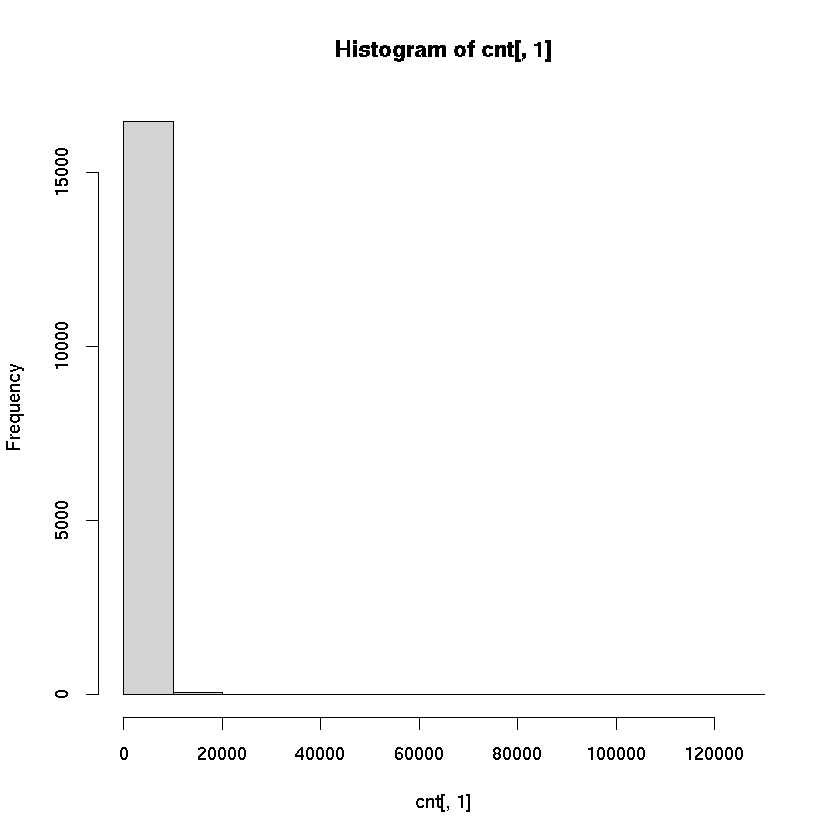

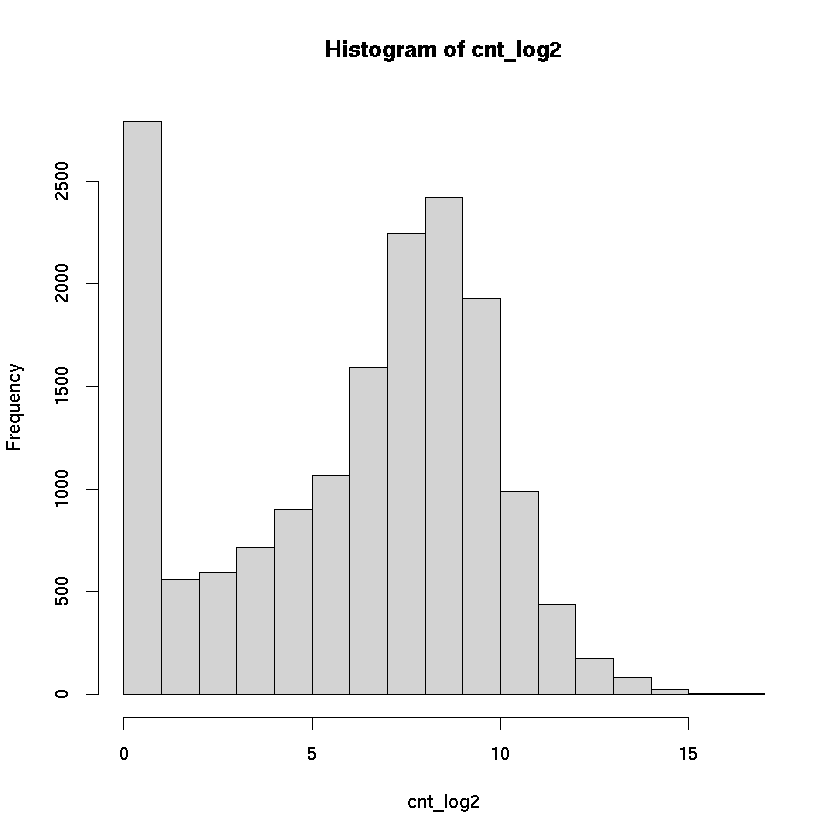

In [45]:
cnt <-read.csv(file="mrnaseq_count_data.csv",header=T,row.names=1,sep=",")

cnt_log2 <- (log2(cnt[,1]+1))
#Log Transformation
hist(cnt[,1]) # without the log transformation
hist(cnt_log2) # can see this log transformed is slightly more centered

